In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# загружаем датасет
df = pd.read_csv('S02-hw-dataset.csv')

# первые строки
df.head()

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


In [8]:
# информация по колонкам
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [9]:
# статистика
df.describe(include='all')

,user_id,age,country,purchases,revenue
count,41.000000,39.000000,41,41.000000,41.000000
unique,NaN,NaN,5,NaN,NaN
top,NaN,NaN,RU,NaN,NaN
freq,NaN,NaN,13,NaN,NaN
mean,20.243902,36.512821,NaN,4.829268,820.048780
std,11.659289,18.304259,NaN,2.710189,613.127269
min,1.000000,5.000000,NaN,-1.000000,0.000000
25%,10.000000,24.000000,NaN,3.000000,432.000000
50%,20.000000,33.000000,NaN,5.000000,693.000000
75%,30.000000,45.500000,NaN,7.000000,1115.000000


In [10]:
# пропуски
df.isna().mean()

user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64

In [11]:
# дубликаты
df.duplicated().sum()

np.int64(1)

In [12]:
# странные значения
print("Возраст > 100:", df[df['age'] > 100])
print("Покупки < 0:", df[df['purchases'] < 0])
print("Выручка < 0:", df[df['revenue'] < 0])

Возраст > 100:    user_id    age country  purchases  revenue
5        6  120.0      FR         -1      785
Покупки < 0:    user_id    age country  purchases  revenue
5        6  120.0      FR         -1      785
Выручка < 0: Empty DataFrame
Columns: [user_id, age, country, purchases, revenue]
Index: []


In [13]:
# частоты по странам
df['country'].value_counts()

country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

In [14]:
# группировка - средняя выручка по стране
df.groupby('country')['revenue'].agg(['mean', 'sum'])

,mean,sum
country,,
CN,1054.000000,2108
DE,1445.500000,8673
FR,675.916667,8111
RU,790.076923,10271
US,557.375000,4459


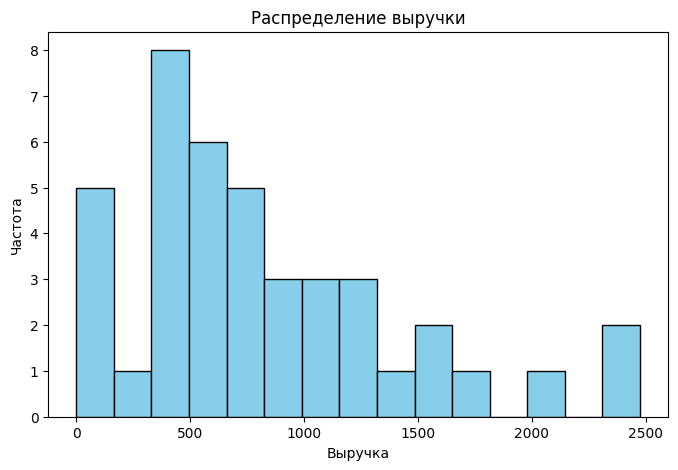

In [15]:
# гистограмма
plt.figure(figsize=(8, 5))
plt.hist(df['revenue'], bins=15, color='skyblue', edgecolor='black')
plt.title('Распределение выручки')
plt.xlabel('Выручка')
plt.ylabel('Частота')
plt.savefig('figures/hist_revenue.png')
plt.show()

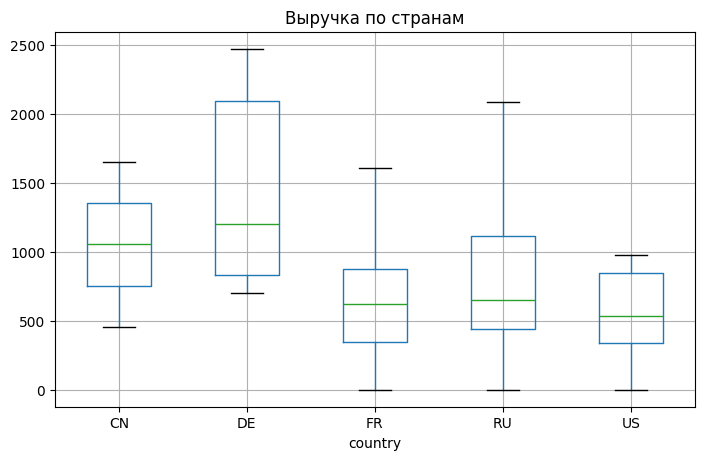

In [19]:
# ящик с усами
plt.figure(figsize=(8, 5))
df.boxplot(column='revenue', by='country', ax=plt.gca())
plt.title('Выручка по странам')
# убираем автоматический заголовок
plt.suptitle('')
plt.savefig('figures/boxplot_revenue_by_country.png')
plt.show()

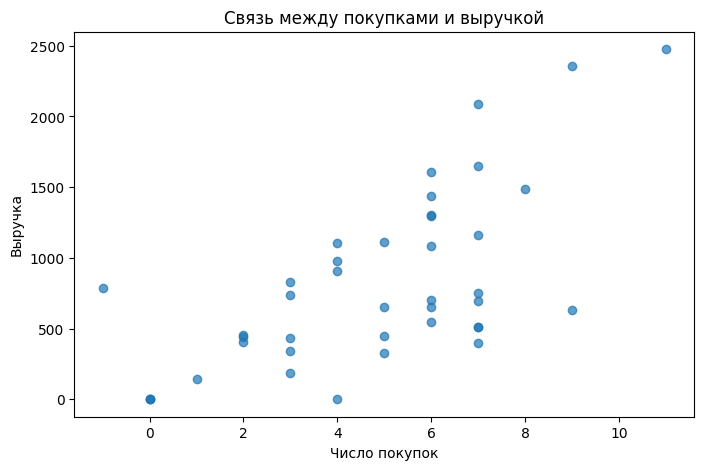

In [20]:
# диаграмма рассеивания
plt.figure(figsize=(8, 5))
plt.scatter(df['purchases'], df['revenue'], alpha=0.7)
plt.title('Связь между покупками и выручкой')
plt.xlabel('Число покупок')
plt.ylabel('Выручка')
plt.savefig('figures/scatter_purchases_revenue.png')
plt.show()